In [2]:
import pandas as pd
import numpy as np
import os

from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import (
    accuracy_score, classification_report, recall_score, confusion_matrix, roc_auc_score, precision_score, f1_score, roc_curve, auc
)
from sklearn.preprocessing import OrdinalEncoder

from catboost import CatBoostClassifier, Pool

In [3]:
import os
print(os.path.exists('/Users/DTZT0/Documents/DataScienceTraining/Data Sets/USA_cars_datasets.csv'))


True


In [51]:
data_path = "/Users/DTZT0/Documents/DataScienceTraining/Data Sets/USA_cars_datasets.csv"
df = pd.read_csv(data_path)
df = df.drop(['Unnamed: 0'], axis=1)
df

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 234.4+ KB


In [47]:
df.dtypes

price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object

In [34]:
df['brand'] = df['brand'].astype('category')
df['model'] = df['model'].astype('object')
df['title_status'] = df['title_status'].astype('category')
df['color'] = df['color'].astype('category')
df['state'] = df['state'].astype('category')

In [36]:
df.to_parquet('../valuation_model_data.parquet', index=False)

# Linear Regression

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Step 1: One-Hot Encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['brand', 'model', 'title_status', 'color', 'state', 'condition'], drop_first=True)

# Step 2: Drop non-useful columns like 'model', 'vin', 'country', and 'lot'
df_encoded = df_encoded.drop(['vin', 'country', 'lot'], axis=1)

# Step 3: Define features (X) and target (y)
X = df_encoded.drop('price', axis=1)  # Features (independent variables)
y = df_encoded['price']  # Target variable

# Step 4: Segment the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions using the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

# Display results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Display model coefficients
print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Mean Squared Error: 46810076.816036105
R-squared: 0.7046552931160706

Model Coefficients: [ 4.35595837e+02 -3.35001475e-02  3.88692476e+03  3.08592452e+03
  3.80288480e+03  8.31644725e+03  2.87580900e+03 -4.93301324e+03
 -3.06862466e+02  4.08822457e+03  6.31028529e+02  1.55329275e+04
 -1.52585634e+04 -1.32297052e+03 -6.65226600e+03  5.53961822e+03
  7.89346905e-06 -1.48865346e+03 -5.76216110e+03  5.45620335e+03
  3.44221396e+03  7.60068220e+02  3.41527410e+03 -4.04216799e+03
  5.26365616e+03 -2.90593986e+03  2.93481642e+03 -2.25588381e+03
 -6.85158290e+03  4.30989609e+03  6.79910940e+03 -5.42167023e+02
  1.84683166e+04  6.76718802e+03 -1.47969149e-06 -9.45178289e+03
  3.61444461e+03 -1.37412872e+04 -6.72123570e+03  2.56483429e+03
 -8.60398741e+03 -1.06968464e+04  1.41931564e+03 -3.57292178e+03
 -1.00231225e+04 -1.60444153e+03 -9.60848496e+03 -6.13100578e+03
 -1.85527014e-07 -1.02230343e+04  2.24913904e+04 -2.82648695e+03
 -1.41402495e+04 -6.85158290e+03 -2.21001696e+04 -1.08876076e+04


# Multiple Linear Regression

In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Assuming df is the DataFrame containing your dataset

# 1. Preprocess the data

# df = df.drop(columns=['condition', 'lot', 'country'])

# Convert categorical columns to numerical using LabelEncoder
le = LabelEncoder()

df['brand'] = le.fit_transform(df['brand'])
df['model'] = le.fit_transform(df['model'])
df['title_status'] = le.fit_transform(df['title_status'])
df['color'] = le.fit_transform(df['color'])
df['state'] = le.fit_transform(df['state'])
# df['country'] = le.fit_transform(df['country'])
# df['condition'] = le.fit_transform(df['condition'])

# 2. Define the independent variables (X) and dependent variable (y)
X = df[['brand', 'model', 'year', 'mileage', 'color', 'state']]
y = df['price']

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize the model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the model

# Calculate R-squared and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Squared Error (MSE): {mse}')

# Optional: Print model coefficients and intercept
print(f'Model Coefficients: {model.coef_}')
print(f'Model Intercept: {model.intercept_}')


R-squared: 0.29245108840995115
Mean Squared Error (MSE): 112141569.26011631
Model Coefficients: [-5.56192596e+02  1.94503418e+01  1.00184441e+03 -4.68441543e-02
 -2.58164446e+01 -1.80156559e+01]
Model Intercept: -1993859.1744649273


# Random forest model:

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Make predictions using the test set
y_pred = rf_model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

# Display results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Display feature importances
print("\nFeature Importances:", rf_model.feature_importances_)

Mean Squared Error: 43735047.3868654
R-squared: 0.7240569631664548

Feature Importances: [3.87770497e-02 3.06438460e-01 2.27010280e-04 4.28236825e-03
 2.22554440e-04 1.26880351e-03 5.71580849e-03 1.26213001e-04
 5.33322078e-03 6.94138503e-03 1.97227669e-03 1.07025757e-03
 8.24059602e-04 1.39534953e-03 1.70091055e-03 3.58580774e-04
 0.00000000e+00 7.52512057e-05 1.10820366e-04 4.66222091e-04
 1.53244820e-03 1.55542739e-04 2.27832174e-04 6.13398001e-06
 3.90746715e-03 4.72335952e-02 1.69959710e-08 2.77806794e-05
 3.52112162e-05 2.53960534e-03 1.06696431e-04 4.14711193e-05
 6.85203298e-03 4.61582719e-04 0.00000000e+00 2.00831655e-04
 2.13070500e-03 2.25295049e-05 4.72449503e-04 4.51780885e-04
 1.79688339e-03 2.27678317e-05 3.38117651e-03 1.83785715e-03
 0.00000000e+00 8.40098514e-05 2.79998113e-04 1.31724771e-05
 0.00000000e+00 6.27352389e-05 1.13593329e-02 1.83525724e-06
 5.36602875e-05 7.72804132e-07 4.69700938e-04 1.38459358e-04
 9.02460794e-07 1.22307995e-04 4.56394223e-04 2.46315468e

# XGBoost Model

In [19]:
import xgboost as xgb

# Step 1: One-Hot Encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['brand', 'model', 'title_status', 'color', 'state', 'condition'], drop_first=True)

# Step 2: Drop non-useful columns like 'model', 'vin', 'country', and 'lot'
df_encoded = df_encoded.drop(['vin', 'country', 'lot'], axis=1)

# Step 3: Define features (X) and target (y)
X = df_encoded.drop('price', axis=1)  # Features (independent variables)
y = df_encoded['price']  # Target variable

# Step 4: Segment the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the XGBoost Regressor model
xg_reg = xgb.XGBRegressor(n_estimators=100, random_state=42)
xg_reg.fit(X_train, y_train)

# Step 6: Make predictions using the test set
y_pred = xg_reg.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

# Display results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Display feature importances
print("\nFeature Importances:", xg_reg.feature_importances_)

Mean Squared Error: 39561024.0
R-squared: 0.7503926753997803

Feature Importances: [3.50810657e-03 1.20413490e-02 5.39002300e-04 7.76276970e-03
 0.00000000e+00 1.58421940e-03 3.35744396e-03 0.00000000e+00
 5.40896086e-03 8.06490984e-03 4.22659749e-03 3.57814436e-03
 3.02389101e-03 1.69807347e-03 4.44221077e-03 1.59379805e-03
 0.00000000e+00 8.14506086e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.03062671e-03 0.00000000e+00
 9.91996098e-03 5.85824996e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.03168118e-03 4.42302960e-04 0.00000000e+00
 1.27783809e-02 1.39009033e-03 0.00000000e+00 0.00000000e+00
 5.48407016e-03 0.00000000e+00 1.80992368e-03 0.00000000e+00
 1.54232448e-02 0.00000000e+00 4.54639085e-03 3.36747267e-03
 0.00000000e+00 2.70068937e-04 6.50881731e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.59572046e-02 6.46390981e-05
 0.00000000e+00 0.00000000e+00 1.99901476e-03 2.94989301e-03
 0.00000000e+00 7.39248353e-04 8.79133586e-04 3.69408051e-03
 7

XGBoost appears to be the best fitting model out of the ones tested with an R-squared of 0.750 and an MSE of 39561024.0.

In [37]:
print(df['price'].max())
print(df['price'].min())

84900
0


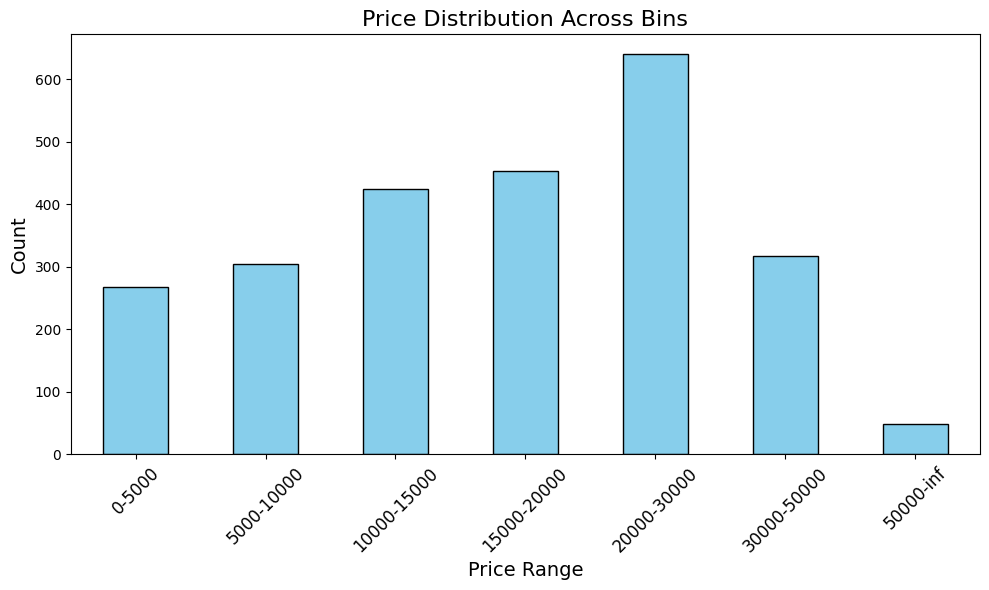

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the bin edges
bin_edges = [0, 5000, 10000, 15000, 20000, 30000, 50000, float('inf')]

# Create labels for the bins
bin_labels = [f"{bin_edges[i]}-{bin_edges[i+1]}" for i in range(len(bin_edges) - 1)]

# Bin the data (replace 'df' and 'price' with your DataFrame and column names)
df['price_bin'] = pd.cut(df['price'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Count values in each bin
bin_counts = df['price_bin'].value_counts(sort=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title("Price Distribution Across Bins", fontsize=16)
plt.xlabel("Price Range", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


In [46]:
print(df['price_bin'].value_counts())


price_bin
20000-30000    640
15000-20000    453
10000-15000    425
30000-50000    317
5000-10000     304
0-5000         268
50000-75000     48
Name: count, dtype: int64


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Create bins for the price variable
bin_edges = [0, 5000, 10000, 15000, 20000, 30000, 50000, float('inf')]
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Fix: Drop NaNs from price_bin
df = df.dropna(subset=['price', 'price_bin'])

# Define features (X) and target (y)
X = df.drop(columns=['price', 'price_bin'])  # Features (excluding target and bin column)
y = df['price_bin']  # Target variable for stratified splitting

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train the XGBoost Regressor
xg_reg = xgb.XGBRegressor(n_estimators=100, random_state=42)
xg_reg.fit(X_train, y_train)

# Make predictions
y_pred = xg_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("\nFeature Importances:", xg_reg.feature_importances_)


KeyError: ['price_bin']

# LightGBM Model

In [60]:
import lightgbm as lgb

lgbm_reg = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgbm_reg.fit(X_train, y_train)

# Step 6: Make predictions using the test set
y_pred = lgbm_reg.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

# Display results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Display feature importances
print("\nFeature Importances:", lgbm_reg.feature_importances_)

c:\Users\DTZT0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1999, number of used features: 79
[LightGBM] [Info] Start training from score 18607.557279
Mean Squared Error: 51956339.11402743
R-squared: 0.672185332942295

Feature Importances: [296 985   0   0   0   0  46   0  53  96   1   0   0   0   0   0   0   1
   0   0   0   0   0   0   0  36   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  15   0  24  20   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  65  32   0   0  34   0   0   1   0   0   0   0
   0   0  28   0  24  17  49   0   0   0  10   0   0   0  32   0   0   0
   0   0   0  18   0   0   0   0   0   0  26   0   0  34   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  12   0   0  22   0 

c:\Users\DTZT0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


##### LightGBM appears to be the worst fitting model:
Mean Squared Error: 51956339.11402743
<br /> R-squared: 0.672185332942295

# Catboost Model 1

In [13]:
from catboost import CatBoostRegressor

# Step 1: Identify categorical features (CatBoost can handle these directly)
categorical_features = ['brand', 'model', 'title_status', 'color', 'state', 'condition']

# Step 2: Define features (X) and target (y)
X = df.drop(['price', 'vin', 'country', 'lot'], axis=1)  # Features (independent variables)
y = df['price']  # Target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the CatBoost Regressor model
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=10, cat_features=categorical_features, random_state=42, verbose=200)
catboost_model.fit(X_train, y_train)

# Step 5: Make predictions using the test set
y_pred = catboost_model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

# Display results
print("\nMean Squared Error:", mse)
print("R-squared:", r2)

# Display feature importances
print("\nFeature Importances:", catboost_model.get_feature_importance())

0:	learn: 11429.4174924	total: 246ms	remaining: 4m 5s
200:	learn: 2842.2741158	total: 44.4s	remaining: 2m 56s
400:	learn: 1388.9212147	total: 1m 23s	remaining: 2m 4s
600:	learn: 788.6637891	total: 2m 3s	remaining: 1m 21s
800:	learn: 458.6733492	total: 2m 48s	remaining: 41.9s
999:	learn: 283.4664249	total: 3m 26s	remaining: 0us

Mean Squared Error: 46789919.80892612
R-squared: 0.7047824722570053

Feature Importances: [13.68568953 22.58028167  5.86167459  2.96868482 13.46140718 10.4740572
 17.37060032 13.59760468]


# Catboost model 2

In [32]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split  # Use this for regression splits
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is the DataFrame containing your data

# 1. Preprocess the data

# Drop columns as needed (e.g., 'condition', 'lot', 'country') - based on previous context
df = df.drop(columns=['condition', 'lot', 'country'])

# Convert categorical columns to numerical using LabelEncoder or CatBoost's built-in encoding
# Here, we'll use CatBoost's handling of categorical features
categorical_features = ['brand', 'model', 'title_status', 'color', 'state']  # Example categorical columns

# 2. Define the independent variables (X) and dependent variable (y)
X = df[['brand', 'model', 'year', 'mileage', 'title_status', 'color', 'state']]  # Adjust to your features
y = df['price']  # Now, we are predicting 'price' (continuous variable)

# 3. Split the data into training and testing sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train a CatBoost regressor model

# Initialize the CatBoost regressor
model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, cat_features=categorical_features, verbose=200)

# Train the model
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the model

# Mean Squared Error (MSE) to assess model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# R-squared (R²) score to assess how well the model explains the variance in the target variable
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Optional: Print model feature importances
print(f'Feature Importances: {model.get_feature_importance()}')


0:	learn: 11484.5802952	total: 233ms	remaining: 3m 52s
200:	learn: 5771.0909744	total: 22.3s	remaining: 1m 28s
400:	learn: 4821.7409638	total: 41.1s	remaining: 1m 1s
600:	learn: 4070.0286248	total: 1m 11s	remaining: 47.4s
800:	learn: 3522.2203131	total: 1m 37s	remaining: 24.3s
999:	learn: 3130.6608665	total: 2m	remaining: 0us
Mean Squared Error (MSE): 47296546.31860053
R-squared: 0.7015859498802646
Feature Importances: [14.95959012 32.40341176  6.90023696 16.45864326  3.77687936  9.96997382
 15.53126472]


# Assessment of Models

Based on testing of different model fits, the top 3 models appear to be: 
1. XGBoost
    - R-squared: 0.750
2. Random Forest
    - R-squared: 0.724
3. Catboost
    - R-squared: 0.705

## XGBoost model export of Streamlit App

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save copies of files to directory
import joblib

joblib.dump(X_train, "../CarValuationModel/X_train.pkl")
joblib.dump(X_test, "../CarValuationModel/X_test.pkl")
joblib.dump(y_train, "../CarValuationModel/y_train.pkl")
joblib.dump(y_test, "../CarValuationModel/y_test.pkl")